### Catenating Datasets in Pandas

#### Vertical Catenation (axis=0)
```python
# Helper function to create DataFrames
def makedf(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# Example DataFrames
a = makedf("AB", [0,1])
b = makedf("AB", [2,3])
c = makedf("CD", [0,1])
d = makedf("BC", [2,3])

# Concatenating vertically
result1 = pd.concat([a, b])
```
Result:
```
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
```

#### Duplicate Indices
```python
# Concatenating with duplicate indices
result2 = pd.concat([a, a])
# Handling duplicate indices
result3 = pd.concat([a, a], ignore_index=True)
result4 = pd.concat([a, a], keys=['first', 'second'])
```
Result (`result2` with duplicate indices):
```
    A   B
0  A0  B0
1  A1  B1
0  A0  B0
1  A1  B1
```
Result (`result3` with renumbered indices):
```
    A   B
0  A0  B0
1  A1  B1
2  A0  B0
3  A1  B1
```
Result (`result4` with hierarchical indexing):
```
         A   B
first  0  A0  B0
       1  A1  B1
second 0  A0  B0
       1  A1  B1
```

#### Horizontal Catenation (axis=1)
```python
# Concatenating horizontally
result5 = pd.concat([a, c], axis=1)
```
Result:
```
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
```

#### Handling Different Columns and Indices
```python
# Outer join (union of columns)
result6 = pd.concat([a, d], sort=False)
# Inner join (intersection of columns)
result7 = pd.concat([a, d], join="inner")
```
Result (`result6` with outer join and NaNs):
```
     A    B    C
0   A0   B0  NaN
1   A1   B1  NaN
2  NaN   B2   C2
3  NaN   B3   C3
```
Result (`result7` with inner join):
```
    B
0  B0
1  B1
2  B2
3  B3
```

In [39]:
"""
Exercise 5.1 (split date continues)
Write function split_date_continues that does

read the bicycle data set
clean the data set of columns/rows that contain only missing values

drops the Päivämäärä column and replaces it with its splitted components as before

Use the concat function to do this.

The function should return a DataFrame with 25 columns (first five related to the date and then the rest 20 concerning the measument location.

Hint: You may use your solution or the model solution from exercise 16 of the previous set as a starting point.
"""

"""
days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))
def split_date():
    df = pd.read_csv("src/Helsingin_pyorailijamaarat.csv", sep=";")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
 
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:,0]
 
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d"""

import pandas as pd
import numpy as np

days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))
def split_date(df):
   
    
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
 
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:,0]
 
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)

    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d


def split_date_continues():
    df = pd.read_csv("part05-e01_split_date_continues/src/Helsingin_pyorailijamaarat.csv", sep=';')

    # cleaning all the missing values
    df = df.dropna(axis = 0, how='all').dropna(axis = 1, how='all')

    # first 5 column for date format
    date_format = split_date(df)
    
    # drop Päivämäärä
    df = df.drop('Päivämäärä', axis=1) 
   
    
    # rest 20 concerning the measurment location
    df = pd.concat([date_format, df], axis=1)

    return df

    
 

def main():
    df = split_date_continues()
    print("Shape:", df.shape)
    print("Column names:\n", df.columns)
    print(df.head())
main()

Shape: (37128, 25)
Column names:
 Index(['Weekday', 'Day', 'Month', 'Year', 'Hour', 'Auroransilta',
       'Eteläesplanadi', 'Huopalahti (asema)', 'Kaisaniemi/Eläintarhanlahti',
       'Kaivokatu', 'Kulosaaren silta et.', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')
  Weekday  Day  Month  Year  Hour  Auroransilta  Eteläesplanadi  \
0     Wed    1      1  2014     0           NaN             7.0   
1     Wed    1      1  2014     1           NaN             5.0   
2     Wed    1      1  2014     2           NaN             2.0   
3     Wed    1      1  2014     3           NaN             5.0   
4     Wed    1      1  2014     4           Na

### Merging DataFrames in Pandas

#### One-to-One Merge
```python
import pandas as pd

# Original DataFrames
df = pd.DataFrame([[1000, "Jack", 21], [1500, "John", 29]], columns=["Wage", "Name", "Age"])
df2 = pd.DataFrame({"Name" : ["John", "Jack"], "Occupation": ["Plumber", "Carpenter"]})

# One-to-One Merge
result_df = pd.merge(df, df2)
```

#### Inner Join with Missing Keys
```python
# Adding a person without wage and age
df3 = pd.concat([df2, pd.DataFrame({ "Name" : ["James"], "Occupation":["Painter"]})], ignore_index=True)

# Inner Join (default behavior)
result_inner_join = pd.merge(df, df3)
```

#### Outer Join
```python
# Outer Join
result_outer_join = pd.merge(df, df3, how="outer")
```

#### Many-to-One and Many-to-Many Relationships
```python
# Books and Collections DataFrames
books = pd.DataFrame({"Title" : ["War and Peace", "Good Omens", "Good Omens"] , 
                      "Author" : ["Tolstoi", "Terry Pratchett", "Neil Gaiman"]})
collections = pd.DataFrame([["Oodi", "War and Peace"],
                           ["Oodi", "Good Omens"],
                           ["Pasila", "Good Omens"],
                           ["Kallio", "War and Peace"]], columns=["Library", "Title"])

# Many-to-Many Merge
libraries_with_books_by = pd.merge(books, collections)
```

### Summary:
- One-to-One Merge: Merging based on a common field.
- Inner Join: Default behavior, keeps only matching keys.
- Outer Join: Includes all keys from both DataFrames.
- Many-to-One and Many-to-Many Merges: Handling relationships where keys may repeat in one or both DataFrames.

These concepts are essential for combining and analyzing data from different sources in Pandas.

In [64]:
"""
Exercise 5.2 (cycling weather)
Merge the processed cycling data set (from the previous exercise) and 
weather data set along the columns year, month, and day. 

Note that the names of these columns might be different in the two tables: 
use the left_on and right_on parameters. Then drop useless columns 'm', 'd', 'Time', and 'Time zone'.

Write function cycling_weather that reads the data sets and returns the resulting DataFrame.
"""
import pandas as pd

days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))
def split_date(df):
   
    
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
 
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:,0]
 
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)

    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d


def split_date_continues():
    df = pd.read_csv("part05-e02_cycling_weather/src/Helsingin_pyorailijamaarat.csv", sep=';')

    # cleaning all the missing values
    df = df.dropna(axis = 0, how='all').dropna(axis = 1, how='all')

    # first 5 column for date format
    date_format = split_date(df)
    
    # drop Päivämäärä
    df = df.drop('Päivämäärä', axis=1) 
   
    
    # rest 20 concerning the measurment location
    df = pd.concat([date_format, df], axis=1)

    return df


def cycling_weather():
    
    cycling_data_set = split_date_continues()
    weather_data_set = pd.read_csv("part05-e02_cycling_weather/src/kumpula-weather-2017.csv", sep=',')
 
  
    
    merge_data = pd.merge(cycling_data_set, weather_data_set, left_on=['Year','Month','Day'], right_on=['Year','m','d'])
    drop_columns = ['m','d','Time','Time zone']
   
    merge_data = merge_data.drop(columns=drop_columns)

    return(merge_data)

"""def cycling_weather():
    wh = pd.read_csv("src/kumpula-weather-2017.csv")
    bike = split_date_continues()
    result = pd.merge(wh, bike, left_on=["Year", "m", "d"], right_on=["Year", "Month", "Day"])
 
    return result.drop(['m', 'd', 'Time', 'Time zone'], axis=1)"""

def main():
    cycling_weather()
    return
main()

(8760, 28)


In [89]:
"""Exercise 5.3 (top bands)
Merge the DataFrames UK top40 and the bands DataFrame that are stored in the src folder. 
Do all this in the parameterless function top_bands, which should return the merged DataFrame. 
Use the left_on and right_on parameters to merge. Test your function from the main function.
"""

import pandas as pd

def top_bands():
    # top40UK
    top40UK = pd.read_csv("part05-e03_top_bands/src/UK-top40-1964-1-2.tsv", sep='\t')
    bands = pd.read_csv("part05-e03_top_bands/src/bands.tsv", sep='\t')
    bands['Band'] = bands['Band'].str.title()
    top40UK['Artist'] =  top40UK['Artist'].str.title()
  
    merge_data = pd.merge(top40UK, bands, left_on='Artist', right_on='Band')
   
    return merge_data

def main():
    top_bands()
    return
main()

### Renaming Columns:
- Utilized the `rename` method to change column names in a DataFrame.
- Applied this to a weather dataset to make the column names more uniform and concise.

### GroupBy Operation:
- Introduced the `groupby` method in Pandas for splitting a DataFrame into groups based on specific criteria.
- Displayed the number of groups using `len(groups)` which counted the number of groups formed.
- Iterated through the groups using a loop to show the count of rows in each group.
- Accessed a specific group using `groups.get_group(2)` to retrieve data for a particular month (February in this case).

### Aggregation Methods:
- Demonstrated various aggregation methods like `mean` and `sum` applied on grouped data (e.g., `groups["Temperature"].mean()` and `groups["Precipitation"].sum()`).
- Handled unwanted values (like `-1.0` in the Precipitation field) by replacing them with zeros in the dataset.

### Other Group Operations:
- Highlighted filtering, transformation, and application as alternative group operations.
- Showed examples of:
  - Filtering groups based on specific criteria using `groupby().filter()`.
  - Transformation to manipulate group-wise data, such as centering values around their respective means.
  - Application of a function to each group's DataFrame using `groupby().apply()`.

### Examples:
- Displayed examples of transforming data within groups, such as sorting within each group based on a particular column.

The provided code snippets showcase the flexibility and power of Pandas' split-apply-combine functionality when working with grouped data in DataFrames.

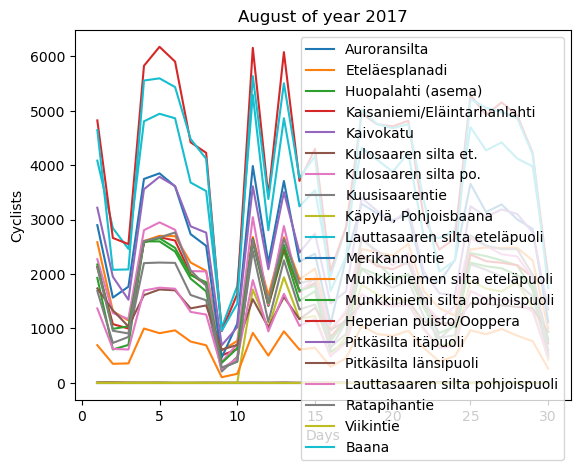

In [70]:
"""
Exercise 5.4 (cyclists per day)
This exercise can give two points at maximum!

Part 1.

Read, clean and parse the bicycle data set as before. Group the rows by year, month, and day. 

Get the sum for each group. Make function cyclists_per_day that does the above. The function should return a DataFrame. 
Make sure that the columns Hour and Weekday are not included in the returned DataFrame.

Part 2.

In the main function, using the function cyclists_per_day, get the daily counts. 
The index of the DataFrame now consists of tuples (Year, Month, Day). 
Then restrict this data to August of year 2017, and plot this data. Don't forget to call the plt.show function of matplotlib. 
The x-axis should have ticks from 1 to 31, and there should be a curve to each measuring station. Can you spot the weekends?
"""
import pandas as pd
import matplotlib.pyplot as plt
days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))
def split_date(df):
   
    
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
 
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:,0]
 
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)

    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d
def split_date_continues():
    df = pd.read_csv("part05-e04_cyclists_per_day/src/Helsingin_pyorailijamaarat.csv", sep=';')

     # cleaning all the missing values
    df = df.dropna(axis = 0, how='all').dropna(axis = 1, how='all')

    # first 5 column for date format
    date_format = split_date(df)
    
    # drop Päivämäärä
    df = df.drop('Päivämäärä', axis=1) 
   
    
    # rest 20 concerning the measurment location
    df = pd.concat([date_format, df], axis=1)
    return df
def cyclists_per_day():
   
    # first 5 column for date format
    date_format = split_date_continues()
    
    # Group the rows by year, month, and day. 
    group_columns = ["Year","Month","Day"]
    drop_group = ['Weekday', 'Hour']
    # Get the sum for each group Year, Month, and Day
    group_data = date_format.drop(columns=drop_group)
    group_data = group_data.groupby(group_columns).sum()
    
    
    return group_data
    
def main():
    daily_counts = cyclists_per_day()
    specifici_month_cyclists = daily_counts.loc[(2017, 9),:]
   
   
    specifici_month_cyclists.plot()

    plt.title("August of year 2017")  # Add a title to the figure
    plt.xlabel("Days")       # Give a label to the x-axis
    plt.ylabel("Cyclists")       # Give a label to the y-axis
    plt.show()  
 
   
main()

"""def cyclists_per_day():
    df = split_date_continues()
    res = df.groupby(["Year", "Month", "Day"]).sum()
    res = res.drop(["Hour"], axis=1)
    return res
    
def main():
    df = cyclists_per_day()
    
    print("Shape:", df.shape)
    print("Columns types:", df.dtypes)
    df = df.loc[(2017, 8), :]
    df.plot()
    plt.show()
main()"""

In [88]:
"""Exercise 5.5 (best record company)
We use again the UK top 40 data set from the first week of 1964 in the src folder. 

Here we define "goodness" of a record company (Publisher) based on the sum of the weeks on chart (WoC) of its singles.

Return a DataFrame of the singles by the best record company (a subset of rows of the original DataFrame). 
Do this with function best_record_company.
"""
import pandas as pd

 
def best_record_company():
    # top40UK
    top40UK = pd.read_csv("part05-e05_best_record_company/src/UK-top40-1964-1-2.tsv", sep='\t')
    print(top40UK.shape)

    # here we going to group by WoC and sum
    publisher_stats = top40UK.groupby('Publisher')['WoC'].sum()
    
 
    # find the best publisher by maximum WoC sum. 
    # it return the index or key of maximum value from pandas series
    best_pubisher = publisher_stats.idxmax()

    # now we extract data frame of the best publisher from the original top40UK
    best_pubisher_record = top40UK[top40UK['Publisher'] == best_pubisher]
 
    return best_pubisher_record

def main():
    best_record_company()
main()

(40, 7)
Publisher
COLPIX                5
COLUMBIA             59
CORAL                 3
DECCA                37
EMBER                 4
FONTANA               5
HMV                   9
LONDON               23
PARLOPHONE           50
PHILIPS              18
PYE                  24
PYE INTERNATIONAL     2
RCA                  12
UNITED ARTISTS        5
WARNER BROTHERS      11
Name: WoC, dtype: int64
    Pos  LW                    Title                    Artist Publisher  \
1     2   6            GLAD ALL OVER       THE DAVE CLARK FIVE  COLUMBIA   
3     4   3     YOU WERE MADE FOR ME  FREDDIE AND THE DREAMERS  COLUMBIA   
9    10   8        DON'T TALK TO HIM             CLIFF RICHARD  COLUMBIA   
11   12  11                 GERONIMO               THE SHADOWS  COLUMBIA   
15   16  12  YOU'LL NEVER WALK ALONE  GERRY AND THE PACEMAKERS  COLUMBIA   
24   25  25     I (WHO HAVE NOTHING)            SHIRLEY BASSEY  COLUMBIA   
39   40  Re            WALKING ALONE           RICHARD ANTHONY  CO

In [122]:
"""
Exercise 5.6 (suicide fractions)
Load the suicide data set from src folder. This data was originally downloaded from Kaggle. 
Kaggle contains lots of interesting open data sets.

Write function suicide_fractions that loads the data set and returns 

a Series that has the country as the (row) index and 
as the column the mean fraction of suicides per population in that country. 

In other words, the value is the average of suicide fractions. 

The information about year, sex and age is not used.
"""
import pandas as pd

def suicide_fractions():

    who_suicide_stats = pd.read_csv("part05-e06_suicide_fractions/src/who_suicide_statistics.csv", sep=',')
    # the mean fraction of suicides per population in that country
    who_suicide_stats['suicide_fraction'] = who_suicide_stats['suicides_no']/ who_suicide_stats['population']

    average_suicide = who_suicide_stats.groupby('country')['suicide_fraction'].mean()

    print(average_suicide.shape)
   
    

    #return (average_suicides)
 

def main():
    suicide_fractions()
main()

(141,)


In [69]:
'''
Exercise 5.7 (suicide weather)
Copy the function suicide fractions from the previous exercise. 

Implement function suicide_weather as described below. 
We use the dataset of average temperature (over years 1961-1990) in different countries 
from src/List_of_countries_by_average_yearly_temperature.html(https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature) . 

You can use the function pd.read_html to get all the tables from a html page. 
By default pd.read_html does not know which row contains column headers and which column contains row headers. 

Therefore, you have to give both index_col and header parameters to read_html. 
Make sure you use the country as the (row) index for both of the DataFrames. 

What is the Spearman correlation between these variables? Use the corr method of Series object. 
Note the the two Series need not be sorted as the indices of the rows (country names) are used to align them.

The return value of the function suicide_weather is a tuple (suicide_rows, temperature_rows, common_rows, spearman_correlation) 

The output from the main function should be of the following form:

Suicide DataFrame has x rowsTemperature DataFrame has x rowsCommon DataFrame has x rowsSpearman correlation: x.x


You might have trouble when trying to convert the temperatures to float. 
This is because the negative numbers on that html page use a special unicode minus sign, which looks typographically nice, 
but the float constructor cannot interpret it as a minus sign. You can try out the following example:

s="\u2212" "5"   
# unicode minus sign and fiveprint(s)try:    
float(s)except ValueError as e:    import sys    print(e, file=sys.stderr)

−5
could not convert string to float: '−5'

But if we explicitly convert unicode minus sign to normal minus sign, it works:

float(s.replace("\u2212", "-"))
-5.0
'''
import pandas as pd

# Copy the function suicide fractions from the previous exercise. 
def suicide_fractions():
 
    who_suicide_stats = pd.read_csv("part05-e07_suicide_weather/src/who_suicide_statistics.csv", sep=',')

    # the mean fraction of suicides per population in that country
    who_suicide_stats['suicide_fraction'] = who_suicide_stats['suicides_no']/ who_suicide_stats['population']

    average_suicide = who_suicide_stats.groupby('country')['suicide_fraction'].mean()

    return(average_suicide)


    
def suicide_weather():
    """
        You can use the function pd.read_html to get all the tables from a html page. 
        By default pd.read_html does not know which row contains column headers and 
        which column contains row headers. 

        Therefore, you have to give both index_col and header parameters to read_html. 
        Make sure you use the country as the (row) index for both of the DataFrames. 

        What is the Spearman correlation between these variables? Use the corr method of Series object. 
        Note the the two Series need not be sorted as the indices of the rows (country names) are used to align them.

        (suicide_rows, temperature_rows, common_rows, spearman_correlation) 
    """
    
    path = 'part05-e07_suicide_weather/src/List_of_countries_by_average_yearly_temperature.html'
    average_suicide = suicide_fractions()
    suicide_rows = len(average_suicide)
    # Set the first column as the index and use the first row as the header
    # extract the csv 
    weather_data = pd.read_html(path, index_col=0, header=0)[0]
    # we explicitly convert unicode minus sign to normal minus sign, it works
    temperature = weather_data.replace(r'[^0-9.-]', '-', regex=True)
   
  
    temperature_rows = len(temperature)
    temperature['Average yearly temperature (1961–1990, degrees Celsius)'] = pd.to_numeric(temperature['Average yearly temperature (1961–1990, degrees Celsius)'])

    # once we merge together the table have same dimension 
    common = pd.merge(average_suicide, temperature, left_index=True, right_index=True)
    common_rows = len(common)

    
    spearman_correlation = common['suicide_fraction'].corr(common['Average yearly temperature (1961–1990, degrees Celsius)'], method="spearman")

    
    return (suicide_rows, temperature_rows, common_rows, spearman_correlation)

def main():
    # conda install -c conda-forge lxml
    (suicide_rows, temperature_rows, common_rows, spearman_correlation) = suicide_weather()
    print(f"""
        Suicide DataFrame has {suicide_rows} rows
        Temperature DataFrame has {temperature_rows} rows
        Common DataFrame has {common_rows} rows
        Spearman correlation: {spearman_correlation:.1}""")
    return
main()

"""
def info(df, name):
    print("\n%s" % name)
    print("=" * len(name))
    print("Shape:", df.shape)
    print("dtypes:\n", df.dtypes)
    if isinstance(df, pd.DataFrame):
        print("column names:", df.columns)
    print(df.head())
    
def suicide_weather():
    suicide = suicide_fractions()
    version = list(map(int, pd.__version__.split(".")))   # Get version of Pandas
    # older Pandas versions don't support displayed_only option 
    if version[0] == 0 and version[1] < 23:   
        tables = pd.read_html("src/List_of_countries_by_average_yearly_temperature.html",
                              header=0, index_col=0)
    else:
        tables = pd.read_html("src/List_of_countries_by_average_yearly_temperature.html",
                              header=0, index_col=0, displayed_only=False)
    
    temperature = tables[1]    # The first table is a non-displayed one, we don't want that
    temperature = pd.to_numeric(temperature.iloc[:, 0].str.replace("\u2212", "-"))
    #info(suicide, "Suicide fractions")
    #info(temperature, "Temperatures")
    corr = suicide.corr(temperature, method="spearman")
    if version[0] == 0 and version[1] < 23:   # older Pandas versions don't support sort option
        common = pd.concat([suicide, temperature], axis=1, join="inner")
    else:
        common = pd.concat([suicide, temperature], axis=1, join="inner", sort=False)
    return (suicide.shape[0], temperature.shape[0], common.shape[0], corr)
"""

                      suicide_fraction  \
United Arab Emirates          0.000013   
United Kingdom                0.000078   
Uruguay                       0.000187   
Uzbekistan                    0.000088   
Zimbabwe                           NaN   

                      Average yearly temperature (1961–1990, degrees Celsius)  
United Arab Emirates                                              27.00        
United Kingdom                                                     8.45        
Uruguay                                                           17.55        
Uzbekistan                                                        12.05        
Zimbabwe                                                          21.00        
-0.5580402318136322

        Suicide DataFrame has 141 rows
        Temperature DataFrame has 191 rows
        Common DataFrame has 108 rows
        Spearman correlation: -0.6


## Time Series

Handling time series data using Pandas in Python. Here's an organized breakdown with some points and concepts:

### Time Series Data Preparation:

#### Creating Timestamps:
- Using `pd.to_datetime()` to convert separate columns for year, month, and day into a timestamp series, constructing a `Date` column.

```python
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
```

#### Index Manipulation:
- Setting the `Date` column as the index for the DataFrame:

```python
wh2 = wh2.set_index("Date")
```

#### Slicing Time Series:
- Retrieving a subset of rows using date ranges:

```python
wh2["2017-01-15":"2017-02-03"]
```

#### Generating Specific Date Ranges:
- Using `pd.date_range()` to generate specific date ranges:

```python
# Mondays in July
pd.date_range("2017-07-01", "2017-07-31", freq="W-MON")

# Business days (Monday to Friday) of July
pd.date_range("2017-07-01", "2017-07-31", freq="B")
```

### Visualizing Time Series Data:

#### Plotting Time Series:
- Visualizing temperature data using Pandas' plotting functionality:

```python
%matplotlib inline
wh2["Temperature"].plot()
```

#### Smoothing Data:
- Applying rolling mean to the temperature data over a window of 30 days:

```python
rolling = wh2.Temperature.rolling(30, center=True)
data = pd.DataFrame({"Temperature": wh2.Temperature, "Rolling mean": rolling.mean()})
data.plot()
```

### Key Points:
- Creating timestamp series using `pd.to_datetime()` for time-based analysis.
- Setting date-based columns as the index for easy time-based slicing.
- Using Pandas' date range to generate specific date sets.
- Visualizing time series data using Pandas' plotting functions.
- Applying rolling mean for data smoothing and trend visualization.

This code snippet provides a comprehensive overview of handling time series data using Pandas in Python, including data preparation, manipulation, visualization, and analysis.

In [30]:
"""
Exercise 5.8 (bicycle timeseries)
Write function bicycle_timeseries that

reads the data set
cleans it
turns its Päivämäärä column into (row) DatetimeIndex (that is, to row names) of that DataFrame
returns the new DataFrame
"""
import pandas as pd

days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))
def split_date():
   
    df = pd.read_csv("part05-e08_bicycle_timeseries/src/Helsingin_pyorailijamaarat.csv", sep=';')
  
     # cleaning all the missing values
    df = df.dropna(axis = 0, how='all').dropna(axis = 1, how='all')

    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]
 
    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:,0]
 
    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)

    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    
    # drop Päivämäärä
    df = df.drop('Päivämäärä', axis=1) 
    
    df = pd.concat([d, df], axis=1)
    return df

def bicycle_timeseries():
    # read the data set from Helsingin bicycle time series data csv
    # cleans it 
  

    # first 5 column for date format
    date_format = split_date()

    # turn 5 date time columns into date time index Time Series.
    date_format["Date"] = pd.to_datetime(date_format[["Year", "Month", "Day", "Hour"]])
    # drop all the columns that we use for creating datetimeindex
    date_format = date_format.drop(columns=["Year", "Month", "Day", "Hour", "Weekday"], axis=1)
    DatetimeIndex = date_format.set_index(date_format["Date"])
    DatetimeIndex = DatetimeIndex.drop(columns=["Date"])
    
    return DatetimeIndex

"""
def bicycle_timeseries():
    df = pd.read_csv("src/Helsingin_pyorailijamaarat.csv", sep=";")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    d = split_date(df)
    ## no need to concatenate, it completely ignore weekday column here 
    df["Date"] = pd.to_datetime(d[["Year", "Month", "Day", "Hour"]]) 
    # it drop the Päivämäärä column and set index date
    df = df.drop("Päivämäärä", axis=1)
    df = df.set_index("Date")
    return df

"""

def main():
    bicycle_timeseries()
    return None
main()

Index(['Auroransilta', 'Eteläesplanadi', 'Huopalahti (asema)',
       'Kaisaniemi/Eläintarhanlahti', 'Kaivokatu', 'Kulosaaren silta et.',
       'Kulosaaren silta po. ', 'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana', 'Date'],
      dtype='object')


In [ ]:
"""
Exercise 5.9 (commute)
In function commute do the following:

Use the function bicycle_timeseries to get the bicycle data. 
Restrict to August 2017, group by the weekday, aggregate by summing. 
Set the Weekday column to numbers from one to seven. Then set the column Weekday as the (row) index. 
Return the resulting DataFrame from the function.

In the main function plot the DataFrame. Xticklabels should be the weekdays. 
Don't forget to call show function!

If you want the xticklabels to be ['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun'] 
instead of numbers (1,..,7), then it may get a bit messy. 
There seems to be a problem with non-numeric x values. 

You could try the following after plotting, but you don't have to:
weekdays="x mon tue wed thu fri sat sun".title().split()
plt.gca().set_xticklabels(weekdays)
"""

import pandas as pd
import matplotlib.pyplot as plt


def commute():
    return None
    
def main():
    commute()
main()